In [12]:
###########################################
# rsampled  from 6 to 21                  #
#                                         #
#  undersampled from 22 until last        #
###########################################
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np
import statsmodels.api as sm
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [4]:
x_train = np.loadtxt('preprocessed1_re/x_train.csv', delimiter=',')
y_train = np.loadtxt('preprocessed1_re/y_train.csv', delimiter=',')
x_test = np.loadtxt('preprocessed1_re/x_test.csv', delimiter=',')
y_test = np.loadtxt('preprocessed1_re/y_test.csv', delimiter=',')

In [5]:
x_train

array([[ 0.39751762,  1.08109585, -0.70610666, ...,  0.        ,
         0.93066818, -1.83449398],
       [ 0.39751762, -0.9248901 , -0.06566118, ...,  0.        ,
         0.93066818, -1.83449398],
       [ 0.39751762, -0.9248901 ,  0.57478429, ...,  0.        ,
         0.93066818,  0.54510945],
       ...,
       [ 0.39751762,  1.08109585,  0.57478429, ...,  0.        ,
         0.93066818,  0.54510945],
       [ 0.39751762,  1.08109585, -0.06566118, ...,  0.        ,
         0.93066818, -1.83449398],
       [ 0.39751762,  1.08109585, -0.06566118, ...,  0.        ,
         0.93066818,  0.54510945]])

In [ ]:
#############################random Forest


In [ ]:
n_estimators_list=range(1,200,10)
record=[]
for n_estimators in n_estimators_list:
    clf=RandomForestClassifier(n_estimators=n_estimators)
    r2=cross_val_score( clf, x_train, y_train, scoring='r2').mean()#cv=5
    record.append(r2)

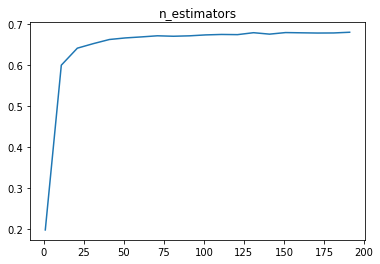

The best parameter: 191


In [90]:
plt.plot(n_estimators_list,record)
plt.title('n_estimators')
plt.show()
print('The best parameter:',n_estimators_list[np.array(record).argsort()[-1:][0]])

In [92]:
n_estimators_list=range(1,200,10)
record=[]
for n_estimators in n_estimators_list:
    clf=RandomForestClassifier(n_estimators=n_estimators)
    r2=cross_val_score( clf, x_train, y_train,cv=5, scoring='r2').mean()
    record.append(r2)

In [ ]:
plt.plot(n_estimators_list,record)
plt.title('n_estimators')
plt.show()
print('The best parameter:',n_estimators_list[np.array(record).argsort()[-1:][0]])

In [6]:
##############################################################
#    resampled x_train,y_train, scaled_x_train,scaled_y test #
##############################################################
x_train = np.loadtxt('preprocessed1_re/x_train.csv', delimiter=',')
y_train = np.loadtxt('preprocessed1_re/y_train.csv', delimiter=',')
x_test = np.loadtxt('preprocessed1_re/x_test.csv', delimiter=',')
y_test = np.loadtxt('preprocessed1_re/y_test.csv', delimiter=',')

In [7]:
##############################
#    n_estimators=191        #
##############################################################
#    resampled x_train,y_train, scaled_x_train,scaled_y test #
##############################################################
randomforest = RandomForestClassifier(n_estimators=191)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93     16924
         1.0       0.24      0.09      0.13      2211

    accuracy                           0.86     19135
   macro avg       0.57      0.53      0.53     19135
weighted avg       0.82      0.86      0.83     19135



In [10]:

print(confusion_matrix(y_test, y_pred))


[[16312   612]
 [ 2013   198]]


In [13]:
print("ROC_AUC_score",roc_auc_score(y_test,y_pred,average=None))

ROC_AUC_score 0.5266952874483645


Text(0.5, 1.0, 'Accuracy Score: 0.8628168278024563')

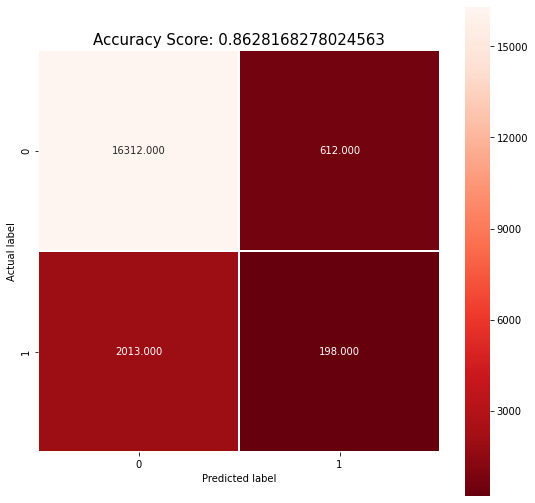

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(randomforest.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

D:\anacod\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0, 0.5, 'True Positive Rate')

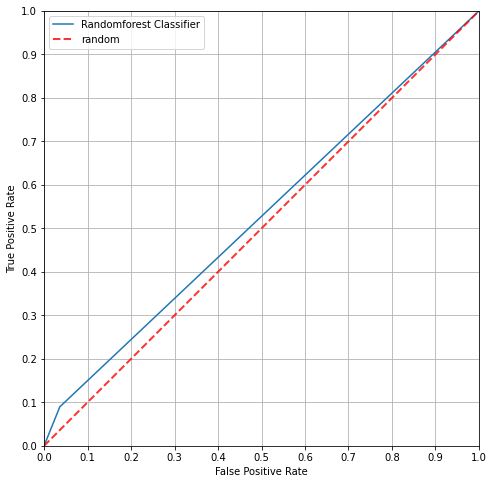

In [15]:
##############
# ROC Curve #
#############
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Randomforest Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [19]:
x_train_ur = np.loadtxt('data/x_train.csv', delimiter=',')
y_train_ur = np.loadtxt('data/y_train.csv', delimiter=',')
x_test_ur = np.loadtxt('data/x_test.csv', delimiter=',')
y_test_ur = np.loadtxt('data/y_test.csv', delimiter=',')

In [20]:
randomforest = RandomForestClassifier(n_estimators=191)
randomforest.fit(x_train, y_train)
y_pred_ur = randomforest.predict(x_test_ur)
print(metrics.classification_report(y_test_ur, y_pred_ur))

              precision    recall  f1-score   support

         0.0       0.02      0.14      0.03      2740
         1.0       0.46      0.10      0.16     21179

    accuracy                           0.10     23919
   macro avg       0.24      0.12      0.10     23919
weighted avg       0.41      0.10      0.14     23919



In [21]:
#################################################################
#    undersampled x_train,y_train, scaled_x_train,scaled_y test #
#################################################################
x_train_undersampled = np.loadtxt('preprocessed1_re/x_train_undersampled.csv', delimiter=',')
y_train_undersampled = np.loadtxt('preprocessed1_re/y_train_undersampled.csv', delimiter=',')
x_test = np.loadtxt('preprocessed1_re/x_test.csv', delimiter=',')
y_test = np.loadtxt('preprocessed1_re/y_test.csv', delimiter=',')

In [22]:
##############################
#    n_estimators=191        #
########################################################################################
#    undersampled x_train,y_train, no undersampling on scaled_x_test,not scaled_y test #
#######################################################################################
randomforest = RandomForestClassifier(n_estimators=191)
randomforest.fit(x_train_undersampled, y_train_undersampled)
y_pred = randomforest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.61      0.73     16924
         1.0       0.17      0.60      0.26      2211

    accuracy                           0.61     19135
   macro avg       0.54      0.61      0.50     19135
weighted avg       0.83      0.61      0.68     19135



In [23]:
from sklearn.metrics import roc_auc_score
print("ROC_AUC_score",roc_auc_score(y_test,y_pred,average=None))

ROC_AUC_score 0.606419274462008


D:\anacod\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0, 0.5, 'True Positive Rate')

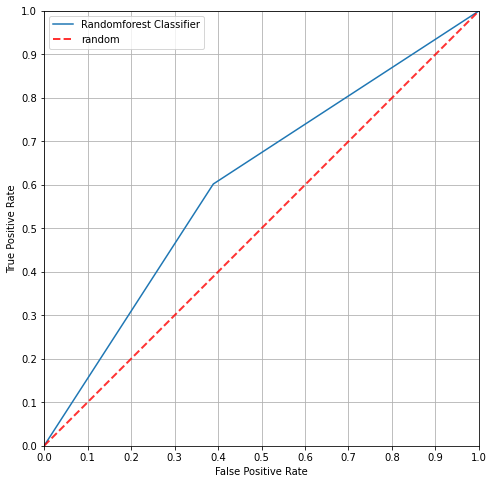

In [24]:
##############
# ROC Curve #
#############
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Randomforest Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0.5, 1.0, 'Accuracy Score: 0.609824928142148')

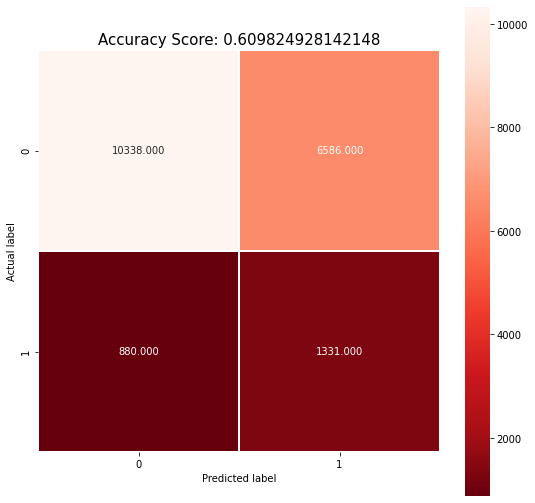

In [25]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(randomforest.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [26]:
randomforest = RandomForestClassifier(n_estimators=191)
randomforest.fit(x_train_undersampled, y_train_undersampled)
y_pred_ur = randomforest.predict(x_test_ur)
print(metrics.classification_report(y_test_ur, y_pred_ur))

              precision    recall  f1-score   support

         0.0       0.02      0.08      0.03      2740
         1.0       0.75      0.35      0.48     21179

    accuracy                           0.32     23919
   macro avg       0.38      0.22      0.25     23919
weighted avg       0.66      0.32      0.43     23919

